# Reinforcement Learning
## Assignment 1

## Submitted by:
## Name: HRITIK BANA
## Roll No.: 19141
## Department: DSE

### Answer 1

In [260]:
from bandit_env import bandit_env 
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

In [261]:
np.random.seed(0)

game = bandit_env([2.5, -3.5, 1.0, 5.0, -2.5], [0.33, 1.0, 0.66, 1.98, 1.65])
print(game.n)
print(game.r_mean)
print(game.r_stddev)

5
[2.5, -3.5, 1.0, 5.0, -2.5]
[0.33, 1.0, 0.66, 1.98, 1.65]


#### (i) epsilon greedy

In [262]:
steps = 1000
converged = []
returns = []

In [263]:
np.random.seed(0)
Y = []
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
for epsilon in epsilons:
    expec = [0 for i in range(game.n)]
    counter = [0, 0, 0, 0, 0]
    reward = 0

    x = [(i + 1) for i in range(steps)]
    y = []

    # print(expec)
    for i in range(steps):
        decider = np.random.rand()
    #     print(decider)
        if decider <= epsilon:
    #         index, prize = random.choice(enumerate(expec))
            index = random.randint(0, game.n - 1)
            prize = game.pull(index)

        else:
    #         index, prize = greedy_action(expec)
            d = Counter(expec)
            occur = d[max(expec)]
    #         print(expec)
    #         print(occur)
    #         if i == 15:
    #             break
            if occur == 1:
                index = np.argmax(expec)
                prize = game.pull(index)

            else:
    #             indexes = list(np.where(np.array(expec) == max(expec)))
                indexes = [k for k, l in enumerate(expec) if l == max(expec)]
    #             print(indexes)
                index = random.choice(indexes)
    #             print(index)
                prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))
    
    converged.append(expec)
    returns.append(reward/1000)
    Y.append(y)

In [264]:
returns

[3.120184932522005,
 4.599594454201527,
 4.7502724890680135,
 4.577144592332321,
 4.29994000875636,
 3.9295089485939005]

In [265]:
final_plot_1 = returns

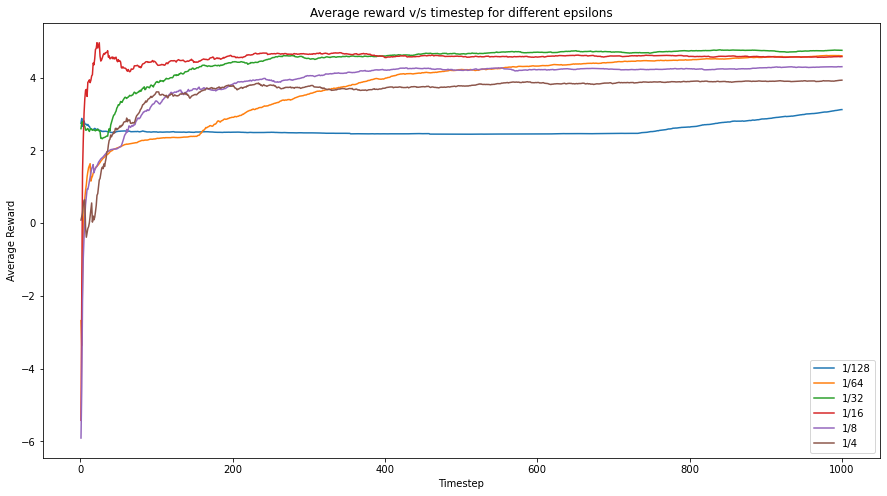

In [266]:
plt.figure(figsize = (15, 8))

for i in range(len(epsilons)):
    plt.plot(x, Y[i])
plt.legend(['1/128', '1/64', '1/32', '1/16', '1/8', '1/4'])
plt.title('Average reward v/s timestep for different epsilons')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

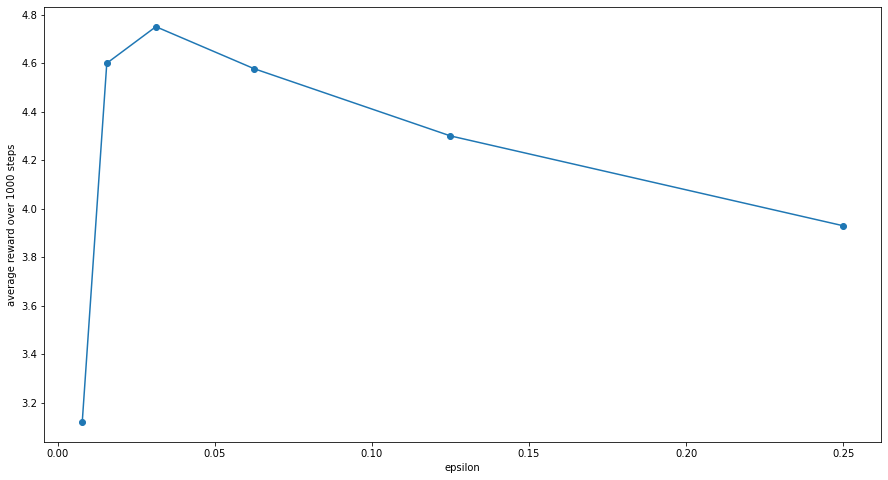

In [267]:
plt.figure(figsize = (15, 8))
plt.scatter(epsilons, returns)
plt.xlabel('epsilon')
plt.ylabel('average reward over 1000 steps')
plt.plot(epsilons, returns)
plt.show()

#### (ii) Upper confidence bound algorithm

In [268]:
converged = []
returns = []

steps = 1000
Y = []

c_values = [1/16, 1/4, 1/2, 1, 2, 4]

x = [(i + 1) for i in range(steps)]




for c in c_values:
    
    reward = 0
    expec = [0 for i in range(game.n)]
    counter = [0]*game.n
    y = []
    
    for init in range(5):
        index = init
        reward = game.pull(index)
        counter[index] += 1
        expec[index] = expec[index] + (1/(counter[index])) * (reward - expec[index])
    
    for i in range(1, steps + 1):
        upper = []
        for n in range(game.n):
            value = expec[n] + c*np.sqrt(np.log(i)/counter[n])

            upper.append(value)

        d = Counter(upper)
        occur = d[max(upper)]
    #         print(expec)
    #         print(occur)
    #         if i == 15:
    #             break
        if occur == 1:
            index = np.argmax(upper)
            prize = game.pull(index)

        else:
    #             indexes = list(np.where(np.array(expec) == max(expec)))
            indexes = [k for k, l in enumerate(upper) if l == max(upper)]
    #             print(indexes)
            index = random.choice(indexes)
    #             print(index)
            prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))

    converged.append(expec)
    returns.append(reward/steps)
    Y.append(y)

  

In [269]:
returns

[4.940281139561161,
 4.895303447220825,
 5.004148308773445,
 5.126550584463763,
 5.009433272817577,
 5.1027761590457645]

In [270]:
final_plot_2 = returns

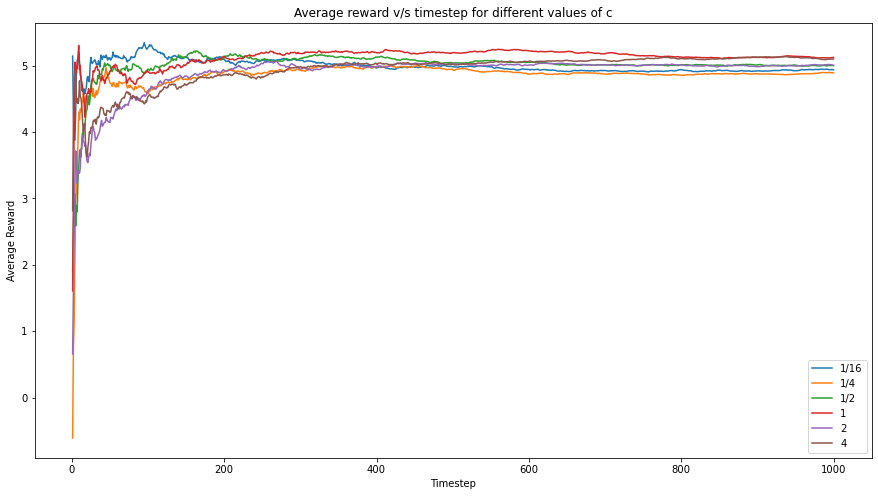

In [271]:
plt.figure(figsize = (15, 8))

for i in range(len(c_values)):
    plt.plot(x, Y[i])
plt.legend(['1/16', '1/4','1/2','1','2','4'])
plt.title('Average reward v/s timestep for different values of c')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

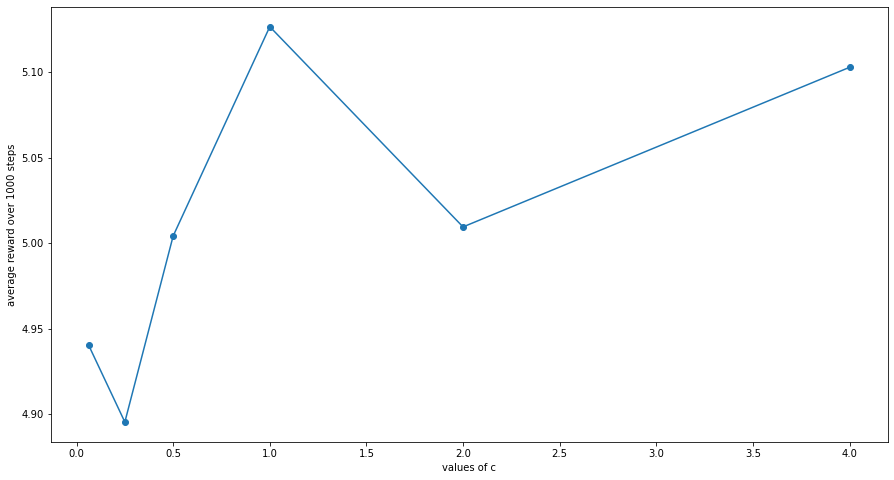

In [272]:
plt.figure(figsize = (15, 8))
plt.scatter(c_values, returns)
plt.plot(c_values, returns)
plt.xlabel('values of c')
plt.ylabel('average reward over 1000 steps')
plt.show()

#### (iii) Greedy with optimistic initial values

In [273]:
steps = 1000
converged = []
returns = []

In [274]:
Y = []
initial = [8, 10, 12, 14, 16]
for opt in initial:
    expec = [opt for i in range(game.n)]
    counter = [0, 0, 0, 0, 0]
    reward = 0

    x = [(i + 1) for i in range(steps)]
    y = []

    # print(expec)
    for i in range(steps):
#         decider = np.random.rand()
#     #     print(decider)
#         if decider <= epsilon:
#     #         index, prize = random.choice(enumerate(expec))
#             index = random.randint(0, game.n - 1)
#             prize = game.pull(index)

#         else:
    #         index, prize = greedy_action(expec)
        d = Counter(expec)
        occur = d[max(expec)]
#         print(expec)
#         print(occur)
#         if i == 15:
#             break
        if occur == 1:
            index = np.argmax(expec)
            prize = game.pull(index)

        else:
#             indexes = list(np.where(np.array(expec) == max(expec)))
            indexes = [k for k, l in enumerate(expec) if l == max(expec)]
#             print(indexes)
            index = random.choice(indexes)
#             print(index)
            prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))
    
    converged.append(expec)
    returns.append(reward/1000)
    Y.append(y)

In [275]:
converged

[[2.720786659136312,
  -2.877580832743398,
  0.3118891036381246,
  4.9284082164547165,
  -1.1328825609930426],
 [2.799084709518299,
  -2.7707135517706387,
  1.4677756776673885,
  4.9448203420815995,
  -4.8834745060931795],
 [2.309409613205446,
  -4.2951164261184225,
  0.6592437766303938,
  5.102306001729629,
  -3.161185761588099],
 [2.0442949988142303,
  -3.603562994816322,
  1.5874411245509172,
  5.084447500701042,
  -2.5906301655205226],
 [2.114295078486716,
  -3.0386512643715946,
  0.4881279927452695,
  5.005798930732102,
  -2.8116127705485425]]

In [276]:
returns

[4.907716795957938,
 4.921653733042598,
 5.077409128924836,
 5.061547253661265,
 4.982527894045484]

In [277]:
final_plot_3 = returns

In [278]:
len(x)

1000

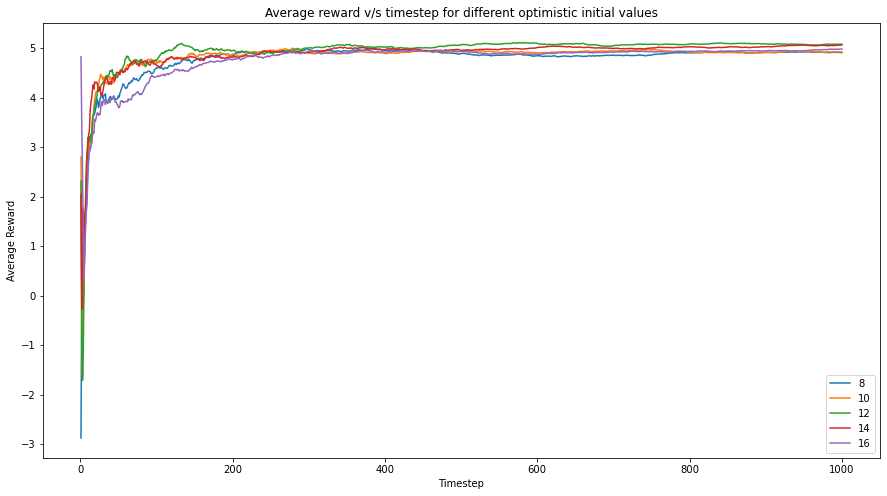

In [279]:
plt.figure(figsize = (15, 8))

for i in range(len(initial)):
    plt.plot(x, Y[i])
plt.legend(initial)
plt.title('Average reward v/s timestep for different optimistic initial values')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

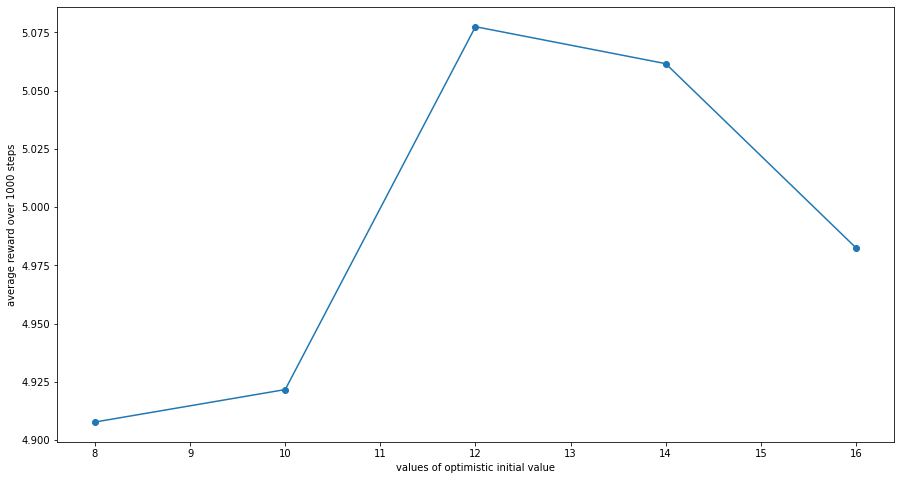

In [280]:
plt.figure(figsize = (15, 8))
plt.scatter(initial, returns)
plt.plot(initial, returns)
plt.xlabel('values of optimistic initial value')
plt.ylabel('average reward over 1000 steps')
plt.show()

#### (iv) Gradient Bandit Algorithm

In [293]:
num = game.n
alphas = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2]
cumulative = [[], [], [], [], [], [], []]
returns = [0]*7

for index, alpha in enumerate(alphas):
    avg_reward = 0
    actual = 0
    H = np.zeros(num)
    P = np.ones(num)/num 

    for t in range(1,1001):
        action = np.random.choice(num, 1, p=P)[0]
        reward = game.pull(action)

        avg_reward = avg_reward + (1.0 / t) * (reward - avg_reward)
        actual += reward

        H[action] = H[action] + alpha * (reward - avg_reward) * (1 - P[action])

        for a in range(num):
                if a != action:
                    H[a] = H[a] - alpha * (reward - avg_reward) * P[a]

        H_exp = np.exp(H)
        P = H_exp / np.sum(H_exp)

        cumulative[index].append(actual/(t+1))

    returns[index] = actual/1000

In [294]:
returns

[4.6993108273724,
 4.727260483467166,
 5.030389052970689,
 5.076956191774932,
 4.978564130686292,
 4.990003403662836,
 4.81689601217234]

In [295]:
final_plot_4 = returns

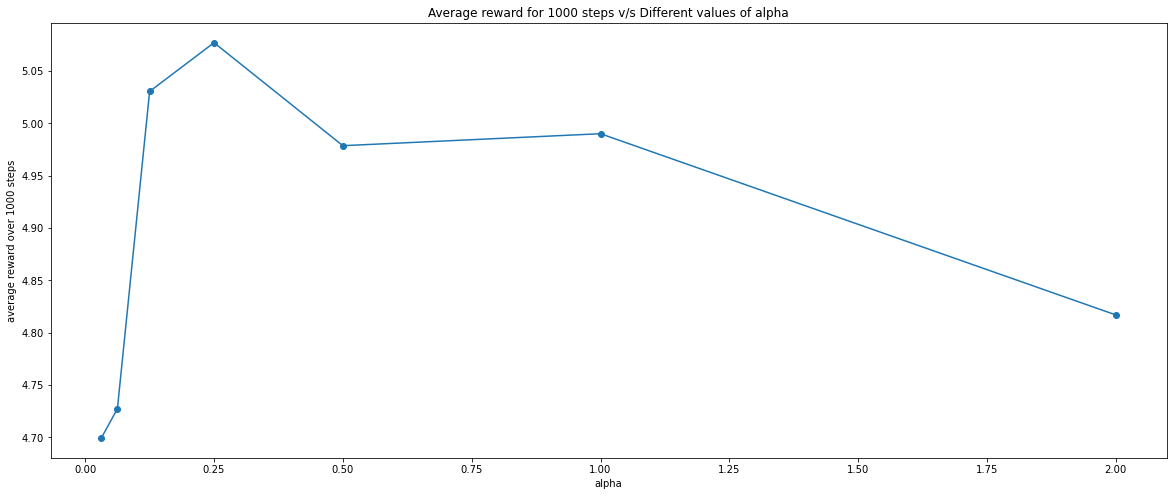

In [296]:
plt.figure(figsize = (20, 8))
x_ticks = ['1/32','1/16','1/8','1/4', '1/2', '1', '2']
plt.scatter(alphas, returns)
plt.plot(alphas, returns)
# plt.xticks([float(Fraction(x)) for x in x_ticks],[f'{x}' for x in x_ticks])
plt.xlabel('alpha')
plt.ylabel('average reward over 1000 steps')
plt.title('Average reward for 1000 steps v/s Different values of alpha')
plt.show()

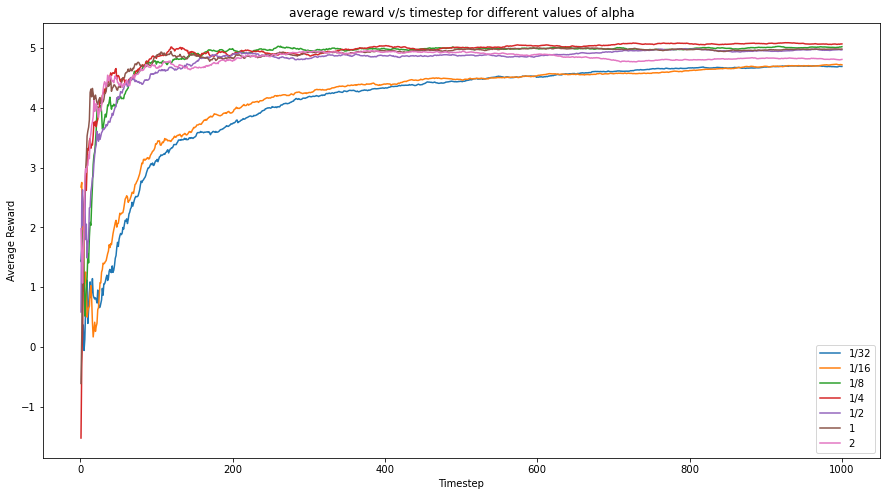

In [297]:
plt.figure(figsize = (15,8))
for i in range(7):
    plt.plot(range(1,1001), cumulative[i])
plt.legend(x_ticks)
plt.title('average reward v/s timestep for different values of alpha')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')

plt.show()

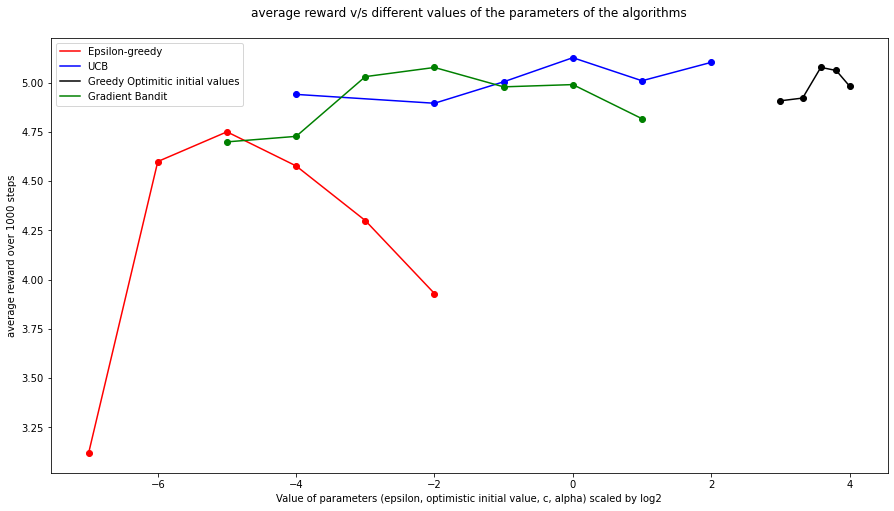

In [298]:
plt.figure(figsize=(15,8))

plt.scatter(np.log2(epsilons) ,final_plot_1, color = 'red')
plt.plot(np.log2(epsilons), final_plot_1, color = 'red', label = 'Epsilon-greedy')

plt.scatter(np.log2(c_values),final_plot_2, color = 'blue')
plt.plot(np.log2(c_values), final_plot_2, color = 'blue',label = 'UCB')

plt.scatter(np.log2(initial) ,final_plot_3, color='black')
plt.plot(np.log2(initial), final_plot_3, color='black' , label = 'Greedy Optimitic initial values')

plt.scatter(np.log2(alphas) ,final_plot_4, color = 'green')
plt.plot(np.log2(alphas), final_plot_4,color = 'green',label = 'Gradient Bandit')

plt.title("average reward v/s different values of the parameters of the algorithms\n")
plt.ylabel("average reward over 1000 steps")
plt.xlabel("Value of parameters (epsilon, optimistic initial value, c, alpha) scaled by log2")
plt.legend()
plt.show()

### Answer 2

In [78]:
states = [0, 1, 2] # Hostel, Canteen, Academic Building
rewards = [-1, 1, 3]
actions = [0, 1] # attend, eat

gamma = 0.9


data = [
        
        # Hostel
        [
         #attend
         [
          [0.5, 0, -1], # prob, next state, reward
          [0.5, 2, +3]
         ],
        
         #eat
         [
          [1, 1, +1]
         ]
        ],
        
        # Canteen
        [
         #attend
         [
          [0.3, 0, -1],
          [0.6, 2, +3],
          [0.1, 1, +1]
         ],
         
         #eat
         [
          [1,1,+1]
         ]
        ],
        
        # Academic Building
        [
         #attend
         [
          [0.3, 1, +1],
          [0.7, 2, +3]
         ],
         #eat
         [
          [0.8, 1, +1],
          [0.2, 2, +3]
         ]
        ]
]


##### (i) Value iteration

In [79]:
def maximum(state):
    value = [0, 0, 0]
    for action in actions:
        value[action] = 0
        for prob, future, prize in data[state][action]:
            value[action] += prob*(prize + gamma*V[future]) 
    if value[0] > value[1]:
        return value[0], 0
    
    return value[1], 1

In [80]:
V = [0, 0, 0] # values corresponding to hostel, canteen, AB, respectively
theta = 0.0001
delta = 1
policy = [1, 1, 1]
iterations = 0
while delta > theta:

    delta = 0
    for state in range(len(data)):
        v = V[state]
        V[state], policy[state] = maximum(state)
        
        delta = max(delta, abs(v - V[state]))
#         print(delta)
#     print(V)
    iterations += 1

In [81]:
policy

[0, 0, 0]

So the optimal policy says that from all the states the agent should choose the action to attend the class.

In [82]:
V

[18.950722244765622, 19.806831682250227, 20.939963212402418]

The above cell shows the optimal value estimate for hostel, canteen and academic building respectively.

In [83]:
iterations

74

The value estimate converges in 74 iterations by the value iteration algorithm.

##### (ii) Policy iterations

In [84]:
V = [0, 0, 0]
policy = [1, 0, 1]

iterations = 0

In [85]:
def policy_evaluation(V, policy, data):
    
    theta = 0.0001
    delta = 1
    
    def calc(state, policy):
        value = 0
        for prob, future, prize in data[state][policy[state]]:
            value += prob*(prize + gamma*V[future])
        return value

    while delta > theta:
        delta = 0
        for state in range(len(data)):
            v = V[state]
            V[state] = calc(state, policy)

            delta = max(delta, abs(v - V[state]))
    #         print(delta)
#         print(V)
#         iterations += 1
    
    policy_improvement(V, policy, data)
    return V, policy
    

def policy_improvement(V, policy, data):
    global iterations
    iterations += 1
    stable = True
    for state in range(len(data)):
        a = policy[state]
        ignore, policy[state] = maximum(state)
        if a != policy[state]:
            stable = False
    
    if stable == True:
        return V, policy
    else:
#         print('once more')
        policy_evaluation(V, policy, data)

In [86]:
V, policy = policy_evaluation(V, policy, data)

In [87]:
V

[18.95077956805357, 19.806885930910774, 20.940016534954047]

The above cell shows the optimal value estimate for hostel, canteen and academic building respectively.

In [88]:
policy

[0, 0, 0]

So the optimal policy says that from all the states the agent should choose the action to attend the class.

In [89]:
iterations

3

The value estimate converges and the optimal policy is found in 3 iterations by the policy iteration algorithm.

#### (iii)

As we saw, the optimal value estimates converge to almost the same values from both the value iteration and policy iteration algorithms, ie $V(Hostel) \approx 18.95$, $V(Canteen) \approx 19.80$, and $V(Acadmic Building) \approx 20.94$ 

Also, both the algorithms predict the same optimal policy of **attend** from each state (hostel, canteen, and acadmic building).

However, on comparing the number of iterations, we notice that the value iteration algorithm converges in 74 iterations, whereas the policy iteration algorithm converges in 3 iterations of policy evaluation and policy improvement functions.